**A desenvolver !!**

<br>
<img src=https://i.imgur.com/GAVB40j.png width="700" />
<br>

<br>
<img src=https://i.imgur.com/GvNMgVY.png width="700" />
<br>

---

# Etapa 1 - Apresentação do tema

**Tema: O que afeta as notas do Enem**

Acresentar no trabalho correlações de algumas variáveis com o resultado obtido. Identificar correlações espúrias.

Motivação Teórica: 
1) Predição do desempenho das disciplinas do ENEM utilizando técnicas de ciêncida de dados.


-------------------------

Mudança no trabalho para a modelagem:
- Recorde Espacial: Ex: Trabalhar só com Estado de SP para minimizar o tamanho dos dados.
- Criar um problema de Classificação
    - Modelos: KNN, árvore de decisão, regresão logistica, svm, emsable
    - Avaliar as métricas dos modelos
    - Agrupando por ano os alunos por município, ex.: Média dos alunos de São Paulo. E mostrar para o leitor a evolução por ano dessa média das capitais. Aumentou as Notas mínima, máxima, média, ver o intervalo de confiança? em relação a outros municípios pequenos. E montar um MAPA com a Geovisualização. Essa parte seria a EDA

- Se for falar de causalidade, usar a regração linear
    - Nível de significancia test F
    - Normalidade dos resíduos
    - o R^2
    - A normalidade dos resíduos
    - A autocorrelação dos resíduos
    - Heteroelasticidade dos resíduos
    - "endoelasticidade"

Quando acrecenta na nota do aluno em relação a quantidade de banheiros na casa?

Determinante do desempenho escolar
Previsão das notas


Clustering 
Depois que agrupou ser as similariadades e se possível classificar algo.

---

In [38]:
# Caminho das Funções no OS
import os 
import sys
sys.path.append(os.getcwd())

# Bancos de Dados
import sqlite3
import random

# data manipulation
import pandas as pd
import numpy as np
from functions.data_manipulation import *

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
from functions.data_visualization import *
%matplotlib inline

# coordenadas geográficas
import geopandas as gpd
import geobr


from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.cluster import KElbowVisualizer

# Outros
from tqdm import tqdm #Barra de progresso
from math import sqrt

# warnings
import warnings
warnings.filterwarnings('ignore')

# set some options in pandas
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_info_columns', 200)
pd.set_option('display.max_info_rows', 200)
pd.set_option('display.max_rows', 200)

In [39]:
from scipy import stats
from scipy.stats import pearsonr

# clustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# metrics and model selection
from sklearn.model_selection import cross_validate, StratifiedKFold, train_test_split, RandomizedSearchCV
from sklearn.metrics import (confusion_matrix, 
                             classification_report,
                             accuracy_score,
                             precision_score,
                             recall_score,
                             auc,
                             roc_auc_score,
                             silhouette_score
                            )

In [3]:
# modelagem
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import LabelEncoder

# outros
import gc
import warnings
from pylab import rcParams
from functools import reduce

In [40]:
# conda install mscorefonts
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']

Fonte dos Dados
1. INEP: https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados
2. OCDE: http://stats.oecd.org/Index.aspx?DatasetCode=RGRADSTY

## Carregando os dados:

In [4]:
#Carregando os dados
#df_19_15 = reduce_mem_usage(pd.read_csv('df_19_15_new.csv', encoding = "utf-8", sep = ','))
df_23_22_SP = pd.read_csv('df_23_22_SP_M_01.csv', encoding = "utf-8", sep = ',')

In [5]:
df_23_22_SP.head()

,Inscricao,Ano,Genero,Estado_Civil,Cor,Faixa_Etaria,Município_Prova,SG_UF,Ciencias_Natureza,Humanas,Linguagem,Matemática,Redação,Treineiro,Escolaridade_pai,Escolaridade_mae,Ocupacao_pai,Ocupacao_mae,Pessoas_residencia,Renda_mensal_familiar,Empregada_domestica,Quantidade_banheiros,Quantidade_quartos,Quantidade_carros,Quantidade_moto,Geladeira,Freezer,Maquina_lavar,Maquina_secar,Microondas,Lava_louca,Aspirador_po,TV,DVD,TV_assinatura,Celular,Telefone_fixo,Computador,Internet,Media
0,210060801601,2023,1,1,1,26,Batatais,SP,564.7,630.3,610.4,680.2,600.0,0,0,4,0,3,2,5,0,1,2,1,B,B,B,B,A,B,A,B,C,B,A,C,A,1,1,617.12
1,210060214081,2023,0,1,1,18,São Paulo,SP,626.5,604.9,614.3,548.8,800.0,0,4,4,1,1,3,2,0,1,2,1,A,B,B,B,A,B,A,A,B,A,A,C,A,1,1,638.90
2,210059855121,2023,1,1,1,18,São Paulo,SP,523.8,576.3,596.5,628.1,600.0,0,2,2,2,1,2,3,0,1,1,0,A,B,A,B,A,A,A,A,B,A,A,B,A,0,1,584.94
3,210059246977,2023,1,1,3,22,São Paulo,SP,507.0,575.8,596.4,579.6,720.0,0,3,4,2,1,5,2,0,2,3,0,A,C,A,B,A,C,A,A,C,A,A,E,A,1,1,595.76
4,210058941500,2023,1,1,3,20,São Paulo,SP,601.5,645.0,603.4,645.0,800.0,0,2,2,2,1,3,6,0,1,2,0,A,B,A,B,A,B,A,B,D,A,A,D,A,1,1,658.98


## Dataprep

In [6]:
# substitui notas missing por zero
#for coluna in lista_targets:
    #df_19_15[coluna] = df_19_15[coluna].fillna(0)
    
# Lebel Encoder
for coluna in lista_vars_explicativas:
    try:
        # substitui valores missings por um valor negativo arbitrário (para o modelo tentar capturar)
        df_23_22_SP[coluna] = df_23_22_SP[coluna].astype(float).replace(np.nan, -99999)
    except:
        # substitui valores missings por um valor categórico arbitrário (para o modelo tentar capturar)
        df_23_22_SP[coluna] = df_23_22_SP[coluna].astype(str).fillna("missing").replace("nan", "missing")
        # labelencoder
        labelencoder = LabelEncoder()
        labelencoder.fit_transform(list(set(df_23_22_SP[coluna].unique().tolist())))
        df_23_22_SP[coluna] = labelencoder.transform(df_23_22_SP[coluna])

# Etapa 4 - Modelagem

Algoritmo_Lasso

In [5]:
# lista de variáveis explicativas para utilizar no modelo
#lista_vars_explicativas = ['INSCRICAO', 'ANO', 'SEXO', 'ESTADO_CIVIL', 'COR', 'IDADE', 'MUNICIPIO', 'SG_UF', 'CIENCIAS_NATUREZA', 'TREINEIRO',
#                           'Escolaridade_pai', 'Escolaridade_mae', 'Ocupacao_pai', 'Ocapacao_mae', 'Pessoas_residencia', 'Renda_mensal_familiar',
#                           'Empregada_domestico', 'Quantidade_banheiros', 'Quantidade_quartos', 'Quantidade_carros', 'Quantidade_moto','Geladeira',
#                           'Freezer', 'Maquina_lavar', 'Maquina_secar', 'Microondas', 'Lava_louca', 'Aspirador_po', 'TV', 'DVD', 'TV_assinatura','Celular',
#                           'Telefone_fixo', 'Computador', 'Internet']
lista_vars_explicativas = ['Ano', 'Genero', 'Genero', 'Faixa_Etaria', 'Município_Prova', 'SG_UF',
                          'Escolaridade_pai', 'Escolaridade_mae', 'Ocupacao_pai', 'Ocupacao_mae', 'Pessoas_residencia', 'Renda_mensal_familiar']

lista_targets = ['Ciencias_Natureza', 'Humanas', 'Linguagem', 'Matemática', 'Redação']

In [7]:
# Divisão das Variaveis
Variaveis_Socio_Economico = ['Escolaridade_pai', 'Escolaridade_mae', 'Ocupacao_pai', 'Ocapacao_mae', 'Pessoas_residencia', 'Renda_mensal_familiar',
                             'Empregada_domestico', 'Quantidade_banheiros', 'Quantidade_quartos', 'Quantidade_carros', 'Quantidade_moto','Geladeira',
                             'Freezer', 'Maquina_lavar', 'Maquina_secar', 'Microondas', 'Lava_louca', 'Aspirador_po', 'TV', 'DVD', 'TV_assinatura','Celular',
                             'Telefone_fixo', 'Computador', 'Internet']

#Variaveis_Atendimento_Especializado = ['IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA', 'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL', 'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF']
#Variaveis_Cadastrais = ['NU_INSCRICAO', 'CO_MUNICIPIO_RESIDENCIA', 'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO', 'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO']

In [8]:
lista_df_submissao, lista_erros_treino, lista_erros_teste = algoritmo_lasso(df_23_22_SP, lista_targets, lista_vars_explicativas)

***************
Ciencias_Natureza
***************
	Genero, 9.970
	Renda_mensal_familiar, 5.855
	Ocupacao_pai, 4.590
	Pessoas_residencia, -4.359
	Escolaridade_mae, 4.127
	Escolaridade_pai, 3.245
	Ano, 3.156
	Ocupacao_mae, 2.697
	Faixa_Etaria, 1.162
	Município_Prova, 0.014
	Genero, 0.000
Erro de treino: 70.60462122124063
Erro de teste: 70.53493153994728
***************
Humanas
***************
	Renda_mensal_familiar, 4.890
	Pessoas_residencia, -4.326
	Ocupacao_pai, 4.115
	Escolaridade_mae, 4.013
	Escolaridade_pai, 2.730
	Ocupacao_mae, 1.907
	Faixa_Etaria, 1.182
	Município_Prova, 0.026
Erro de treino: 70.570092656213
Erro de teste: 70.75017750077475
***************
Linguagem
***************
	Escolaridade_mae, 3.847
	Renda_mensal_familiar, 3.748
	Pessoas_residencia, -3.644
	Ocupacao_pai, 3.474
	Escolaridade_pai, 2.216
	Ocupacao_mae, 1.435
	Faixa_Etaria, 0.183
	Município_Prova, 0.027
Erro de treino: 62.778976234997835
Erro de teste: 62.963036328346426
***************
Matemática
*************

Métrica utilizada: MCRMSE (Mean Columnwise Root Mean Squared Error)

In [9]:
# junta predições em um único dataframe
path_output_submission='submission.csv'
print ('Erros de treino:', lista_erros_treino)
print ('Erros de teste:', lista_erros_teste)
print ('Erro médio de treino:', np.mean(lista_erros_treino))
print ('Erro médio de teste:', np.mean(lista_erros_teste))
df_submit_prediction = reduce(lambda left, right: pd.merge(left, right,on=['Inscricao'], how='inner'), lista_df_submissao)
df_submit_prediction.to_csv(path_output_submission, sep=',', index=False)
print (df_submit_prediction.shape)
df_submit_prediction.head()

Erros de treino: [70.60462122124063, 70.570092656213, 62.778976234997835, 105.98670731751291, 169.7426132287188]
Erros de teste: [70.53493153994728, 70.75017750077475, 62.963036328346426, 105.93493239862973, 169.5548503715011]
Erro médio de treino: 95.93660213173663
Erro médio de teste: 95.94758562783986
(630449, 6)


,Inscricao,Ciencias_Natureza,Humanas,Linguagem,Matemática,Redação
0,210060801601,518.361820,547.287084,535.781524,567.235674,562.824017
1,210060214081,491.698998,534.346900,533.387827,530.149910,637.351438
2,210059855121,501.730454,534.191964,532.129209,558.686868,587.906204
3,210059246977,498.944852,531.810737,528.089280,550.770192,557.144070
4,210058941500,517.261691,546.900821,540.094811,580.795110,601.643615


---

---

Cluster

In [22]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import seaborn as sns
import pandas as pd
import numpy as np

In [10]:
#Carregando os dados
#df_19_15 = reduce_mem_usage(pd.read_csv('df_19_mini.csv', encoding = "utf-8", sep = ','))
df_23_22_SP = pd.read_csv('df_23_22_SP_M_01.csv', encoding = "utf-8", sep = ',')

In [12]:
print(df_23_22_SP.shape)
#Removendo o NAN IDADE
df_23_22_SP.dropna(how = 'any', subset = 'Faixa_Etaria', inplace = True)
print(df_23_22_SP.shape)

(630449, 40)
(630449, 40)


In [13]:
df_23_22_SP.head()

,Inscricao,Ano,Genero,Estado_Civil,Cor,Faixa_Etaria,Município_Prova,SG_UF,Ciencias_Natureza,Humanas,Linguagem,Matemática,Redação,Treineiro,Escolaridade_pai,Escolaridade_mae,Ocupacao_pai,Ocupacao_mae,Pessoas_residencia,Renda_mensal_familiar,Empregada_domestica,Quantidade_banheiros,Quantidade_quartos,Quantidade_carros,Quantidade_moto,Geladeira,Freezer,Maquina_lavar,Maquina_secar,Microondas,Lava_louca,Aspirador_po,TV,DVD,TV_assinatura,Celular,Telefone_fixo,Computador,Internet,Media
0,210060801601,2023,1,1,1,26,Batatais,SP,564.7,630.3,610.4,680.2,600.0,0,0,4,0,3,2,5,0,1,2,1,B,B,B,B,A,B,A,B,C,B,A,C,A,1,1,617.12
1,210060214081,2023,0,1,1,18,São Paulo,SP,626.5,604.9,614.3,548.8,800.0,0,4,4,1,1,3,2,0,1,2,1,A,B,B,B,A,B,A,A,B,A,A,C,A,1,1,638.90
2,210059855121,2023,1,1,1,18,São Paulo,SP,523.8,576.3,596.5,628.1,600.0,0,2,2,2,1,2,3,0,1,1,0,A,B,A,B,A,A,A,A,B,A,A,B,A,0,1,584.94
3,210059246977,2023,1,1,3,22,São Paulo,SP,507.0,575.8,596.4,579.6,720.0,0,3,4,2,1,5,2,0,2,3,0,A,C,A,B,A,C,A,A,C,A,A,E,A,1,1,595.76
4,210058941500,2023,1,1,3,20,São Paulo,SP,601.5,645.0,603.4,645.0,800.0,0,2,2,2,1,3,6,0,1,2,0,A,B,A,B,A,B,A,B,D,A,A,D,A,1,1,658.98


In [14]:
df_23_22_SP.describe().T.round(3)


,count,mean,std,min,25%,50%,75%,max
Inscricao,630449.0,2.100583e+11,1973329.613,2.100545e+11,2.100564e+11,2.100582e+11,2.100601e+11,2.100621e+11
Ano,630449.0,2.022517e+03,0.500,2.022000e+03,2.022000e+03,2.023000e+03,2.023000e+03,2.023000e+03
Genero,630449.0,4.020000e-01,0.490,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
Estado_Civil,630449.0,1.027000e+00,0.336,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00
Cor,630449.0,1.690000e+00,0.962,0.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,5.000000e+00
Faixa_Etaria,630449.0,1.976800e+01,5.332,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,7.000000e+01
Ciencias_Natureza,630449.0,5.146470e+02,79.386,3.203000e+02,4.552000e+02,5.083000e+02,5.666000e+02,8.753000e+02
Humanas,630449.0,5.504680e+02,76.833,2.935000e+02,5.036000e+02,5.546000e+02,6.025000e+02,8.291000e+02
Linguagem,630449.0,5.439370e+02,67.572,2.712000e+02,5.041000e+02,5.495000e+02,5.903000e+02,7.978000e+02
Matemática,630449.0,5.716250e+02,121.385,3.218000e+02,4.760000e+02,5.693000e+02,6.579000e+02,9.857000e+02


In [15]:
df_23_22_SP.columns.to_list()[-1]

'Media'

In [16]:
# filtra as colunas que serão usadas no K-Means
X = df_23_22_SP[df_23_22_SP.columns.to_list()[-2:]]
X.head()

,Internet,Media
0,1,617.12
1,1,638.90
2,1,584.94
3,1,595.76
4,1,658.98


In [18]:
lista = ['Media', 'Faixa_Etaria']

In [19]:
X = df_23_22_SP[lista]

In [20]:
print(X.shape)
X.head(2)

(630449, 2)


,Media,Faixa_Etaria
0,617.12,26
1,638.90,18


In [23]:
# instancia a função para padronizar os dados
scaler = StandardScaler()

In [24]:
# padroniza a matriz X
X_scaled = scaler.fit_transform(X)

In [25]:
X_scaled

array([[ 0.60394801,  1.16862736],
       [ 0.85549481, -0.3316286 ],
       [ 0.23228705, -0.3316286 ],
       ...,
       [-2.45041676, -0.3316286 ],
       [ 0.58546891, -0.3316286 ],
       [ 0.61318757,  1.16862736]])

In [26]:
# instancia o algoritmo KMeans
kmeans = KMeans(n_clusters = 4, random_state = 10)

In [27]:
# fita com a matriz X padronizada
kmeans.fit(X_scaled)

KMeans(n_clusters=4, random_state=10)

In [28]:
# rótulos obtidos pelo K-means
labels = kmeans.labels_
# centróides
centroids = kmeans.cluster_centers_

In [29]:
# rótulos após o agrupamento
labels

array([1, 0, 0, ..., 2, 0, 1], dtype=int32)

In [30]:
# coordendas dos centróides
centroids

array([[ 0.91722816, -0.24272805],
       [-0.35557476,  1.14228776],
       [-0.70993379, -0.30702443],
       [-0.63261036,  4.42103618]])

In [31]:
X.head()

,Media,Faixa_Etaria
0,617.12,26
1,638.90,18
2,584.94,18
3,595.76,22
4,658.98,20


In [33]:
# adiciona a coluna labels do rótulos obtidos pelo K-Means
X['Cluster'] = labels

In [34]:
X.head()

,Media,Faixa_Etaria,Cluster
0,617.12,26,1
1,638.90,18,0
2,584.94,18,0
3,595.76,22,0
4,658.98,20,0


In [35]:
df_23_22_SP['Cluster'] = labels

In [36]:
df_23_22_SP.head()

,Inscricao,Ano,Genero,Estado_Civil,Cor,Faixa_Etaria,Município_Prova,SG_UF,Ciencias_Natureza,Humanas,Linguagem,Matemática,Redação,Treineiro,Escolaridade_pai,Escolaridade_mae,Ocupacao_pai,Ocupacao_mae,Pessoas_residencia,Renda_mensal_familiar,Empregada_domestica,Quantidade_banheiros,Quantidade_quartos,Quantidade_carros,Quantidade_moto,Geladeira,Freezer,Maquina_lavar,Maquina_secar,Microondas,Lava_louca,Aspirador_po,TV,DVD,TV_assinatura,Celular,Telefone_fixo,Computador,Internet,Media,Cluster
0,210060801601,2023,1,1,1,26,Batatais,SP,564.7,630.3,610.4,680.2,600.0,0,0,4,0,3,2,5,0,1,2,1,B,B,B,B,A,B,A,B,C,B,A,C,A,1,1,617.12,1
1,210060214081,2023,0,1,1,18,São Paulo,SP,626.5,604.9,614.3,548.8,800.0,0,4,4,1,1,3,2,0,1,2,1,A,B,B,B,A,B,A,A,B,A,A,C,A,1,1,638.90,0
2,210059855121,2023,1,1,1,18,São Paulo,SP,523.8,576.3,596.5,628.1,600.0,0,2,2,2,1,2,3,0,1,1,0,A,B,A,B,A,A,A,A,B,A,A,B,A,0,1,584.94,0
3,210059246977,2023,1,1,3,22,São Paulo,SP,507.0,575.8,596.4,579.6,720.0,0,3,4,2,1,5,2,0,2,3,0,A,C,A,B,A,C,A,A,C,A,A,E,A,1,1,595.76,0
4,210058941500,2023,1,1,3,20,São Paulo,SP,601.5,645.0,603.4,645.0,800.0,0,2,2,2,1,3,6,0,1,2,0,A,B,A,B,A,B,A,B,D,A,A,D,A,1,1,658.98,0


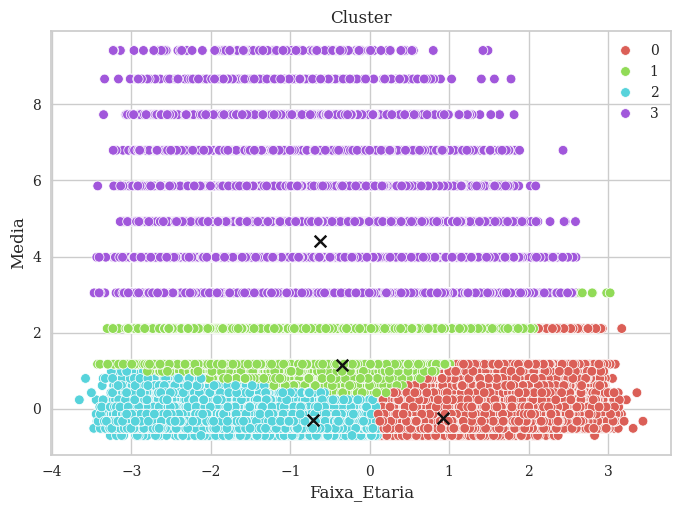

In [41]:
sns.scatterplot(x = X_scaled[:,0],y = X_scaled[:,1],
                hue = labels,
                palette = sns.color_palette("hls", 4));
plt.xlabel('Faixa_Etaria', fontsize=12);plt.ylabel('Media', fontsize = 12);plt.title('Cluster')
plt.scatter(centroids[:,0],centroids[:,1],marker = 'x',s = 70,color = 'k');

Agora Identificar o perfil de cada Cluster. Similaridade

In [43]:
df_23_22_SP.Cluster.value_counts(normalize = True)

Cluster
2    0.466940
0    0.416565
1    0.082478
3    0.034017
Name: proportion, dtype: float64

In [44]:
df_23_22_SP.groupby(by = 'Cluster')[['Ciencias_Natureza', 'Humanas', 'Linguagem', 'Matemática', 'Redação']].mean()

,Ciencias_Natureza,Humanas,Linguagem,Matemática,Redação
Cluster,,,,,
0,572.033342,606.056386,590.435407,668.408840,784.520929
1,500.181567,543.047360,536.163801,529.057650,560.283857
2,467.034031,502.836937,505.930490,497.504185,543.757227
3,500.558099,541.544153,515.063229,507.062515,486.362026


Grupos de média de idades por média de notas.
- Qual caracteríscas desse alunos em comum?
- Pesquisar nas colunas para deferenciar os cluster.
- Classificar dados essas caracteríscas

-----------

Outra funcionalidade interessante que vale a pena dar uma olhada é o método fit_transform().
- O método fit_transform() executa o K-means para agrupar os dados e retorna uma tabela de distâncias.
- A tabela de distâncias é criada de forma que em cada instância contém os valores de distância em relação a cada cluster.

In [45]:
distance = pd.concat([pd.DataFrame(kmeans.fit_transform(X)), pd.Series(labels)], axis = 1)
distance.columns = list(range(0, 4))+['Cluster']

In [46]:
distance.head()

,0,1,2,3,Cluster
0,17.621360,95.026962,77.769177,183.058204,1
1,38.081625,116.635980,55.701595,204.807000,0
2,15.959378,62.702657,109.654911,150.859338,0
3,5.784119,73.520855,98.866855,161.646637,0
4,58.143946,136.698596,35.616382,224.864398,0


-----------------

Método Elbow

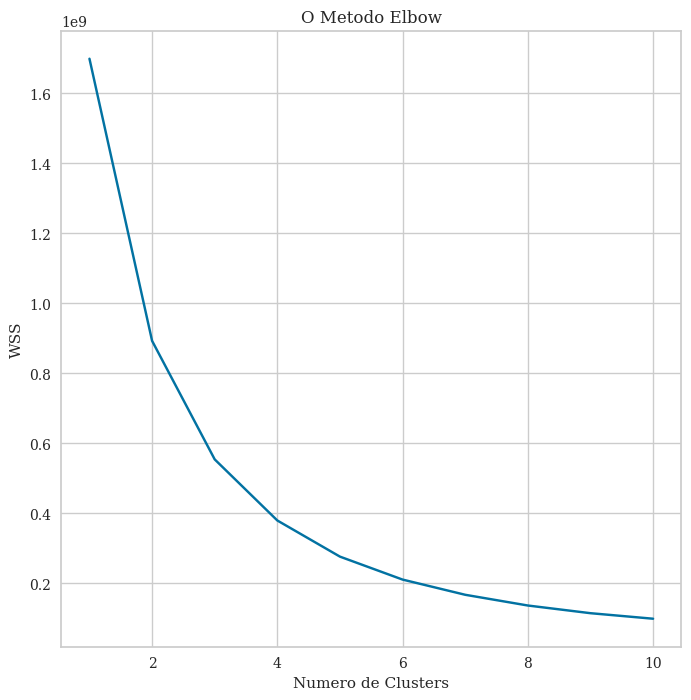

In [47]:
plt.figure(figsize=(8,8))

# plotando o gráfico do método elbow
wcss = []
 
for i in range(2, 12):#testan valor de k entre 2 e 11
    #kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

#Veja a listagem dos valores do atributo inertia_ (wcss)
plt.plot(range(1, 11), wcss)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

In [31]:
wcss_df = pd.DataFrame({'WCSS': wcss, 'k': np.arange(2, 12)})
wcss_df

,WCSS,k
0,1.594045e+09,2
1,8.400849e+08,3
2,5.278865e+08,4
3,3.668542e+08,5
4,2.711092e+08,6
5,2.107042e+08,7
6,1.697190e+08,8
7,1.410991e+08,9
8,1.210565e+08,10
9,1.058665e+08,11


In [50]:
#from sklearn.cluster import KMeans
#from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

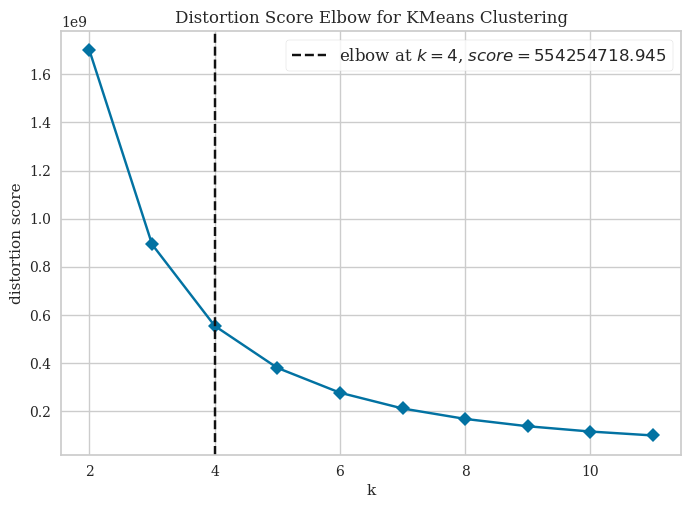

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [51]:
visualizer = KElbowVisualizer(kmeans, k=(2, 12), timings=False)

visualizer.fit(X)
visualizer.show()

Silhouette Score

In [52]:
kmeans.labels_

array([10, 10,  0, ...,  4, 10, 10], dtype=int32)

In [53]:
sillhoute_scores = []
n_cluster_list = np.arange(2,4).astype(int) #testan valor de k entre 2 e 11

for n_cluster in n_cluster_list:
    kmeans = KMeans(n_clusters=n_cluster)
    cluster_found = kmeans.fit_predict(X)
    sillhoute_scores.append(silhouette_score(X, kmeans.labels_))

KeyboardInterrupt: 

In [ ]:
plt.plot(n_cluster_list, sillhoute_scores)
plt.show()

-------------------

Outros

In [ ]:
print(np.isnan(X).any(axis=1))

In [ ]:
np.where(np.isnan(X))

In [ ]:
where = np.where(np.isnan(X))
where

In [ ]:
# Elimina NAN do array numpy
X = X[~np.isnan(X)]

-------------------

DBSCAN

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
#from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestNeighbors

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Carregando os dados
#df_19_15 = reduce_mem_usage(pd.read_csv('df_19_mini.csv', encoding = "utf-8", sep = ','))
df_23_22_SP = pd.read_csv('df_23_22_SP_M_01.csv', encoding = "utf-8", sep = ',')

In [63]:
print(df_23_22_SP.shape)
#Removendo o NAN IDADE
df_23_22_SP.dropna(how = 'any', subset = 'Faixa', inplace = True)
print(df_23_22_SP.shape)

(634135, 40)
(634124, 40)


In [64]:
df_23_22_SP.head()

,INSCRICAO,ANO,IDADE,SEXO,ESTADO_CIVIL,COR,TREINEIRO,MUNICIPIO,SG_UF,CIENCIAS_NATUREZA,HUMANAS,LINGUAGENS,MATEMATICA,REDACAO,Escolaridade_pai,Escolaridade_mae,Ocupacao_pai,Ocapacao_mae,Pessoas_residencia,Renda_mensal_familiar,Empregada_domestico,Quantidade_banheiros,Quantidade_quartos,Quantidade_carros,Quantidade_moto,Geladeira,Freezer,Maquina_lavar,Maquina_secar,Microondas,Lava_louca,Aspirador_po,TV,DVD,TV_assinatura,Celular,Telefone_fixo,Computador,Internet,MEDIA
0,190001592266,2019,17.0,M,1,1,0,São Paulo,SP,543.9,548.1,502.5,480.7,400.0,E,E,B,B,5,F,A,B,C,B,A,B,B,B,A,B,A,A,B,A,B,C,B,B,B,495.04
1,190002037437,2019,25.0,F,1,1,0,Brasília,DF,576.6,637.3,584.2,673.3,380.0,E,E,B,B,4,C,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,570.28
2,190001184600,2019,19.0,M,1,3,0,Macapá,AP,465.2,513.8,489.9,547.2,520.0,H,H,B,A,3,B,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,507.22
3,190001867759,2019,44.0,F,1,1,0,Fazenda Rio Grande,PR,494.1,568.8,546.4,565.9,660.0,B,D,B,B,4,E,A,B,D,A,A,B,A,B,A,A,A,A,B,A,A,D,B,B,B,567.04
4,190002037440,2019,17.0,M,1,3,0,Brasília,DF,389.7,431.1,482.0,529.7,560.0,B,E,A,B,4,B,B,B,C,B,A,B,A,B,A,B,A,A,B,B,A,D,A,A,A,478.50


In [65]:
lista = ['MEDIA', 'IDADE']

In [66]:
X = df_19_15[lista]

In [67]:
print(X.shape)
X.head(2)

(634124, 2)


,MEDIA,IDADE
0,495.04,17.0
1,570.28,25.0


In [ ]:
#Criar 1000 pontos aletorios ao redor dos 3 pontos centrais criados abaixo, com desvio padrao também informado

centers = [[1, 0.5], [2, 2], [1, -1]]
stds = [0.1, 0.4, 0.3]

SEED = 0

#labels_true recebe os num do grupos para cada x

X, labels_true = make_blobs(n_samples=1000, centers=centers, cluster_std=stds, random_state = SEED)

#print(X)
#print(X.shape)
#print(labels_true)

In [68]:
# teste do DBSCAN com um novo eps
dbscan = DBSCAN(eps = 0.2, min_samples = 10)
dbscan.fit(X) 
labels = dbscan.labels_

In [ ]:
# plot dos resultados
fig = plt.figure(figsize=(8, 8))
#hue: colere conforme criterio passado (labes estabelecidas por DBSCAN)
sns.scatterplot(X[:,0], X[:,1], 
                hue=["cluster-{}".format(x) for x in labels]) 
plt.savefig("dbscan_dumb.png", dpi=300)

In [ ]:
sns.scatterplot(x = X_scaled[:,0],y = X_scaled[:,1],
                hue = labels,
                palette = sns.color_palette("hls", 4));
plt.xlabel('IDADE', fontsize=12);plt.ylabel('MEDIA', fontsize = 12);plt.title('Cluster')
plt.scatter(centroids[:,0],centroids[:,1],marker = 'x',s = 70,color = 'k');

---------------------

-----------------

"O que afeta as notas do Enem?"
- Estimação Paramétrica.

In [197]:
import statsmodels.api as sm
import scipy.stats
#from statsmodels.graphics.gofplots import qqplot
#from statsmodels.stats.outliers_influence import variance_inflation_factor 
#from yellowbrick.regressor import ResidualsPlot

In [229]:
#Carregando os dados
#df_19_15 = reduce_mem_usage(pd.read_csv('df_19_mini.csv', encoding = "utf-8", sep = ','))
df_19_15 = pd.read_csv('df_19_mini.csv', encoding = "utf-8", sep = ',')

In [230]:
print(df_19_15.shape)
#Removendo o NAN IDADE
df_19_15.dropna(how = 'any', subset = 'IDADE', inplace = True)
print(df_19_15.shape)

(634135, 40)
(634124, 40)


In [200]:
df_19_15.head()

,INSCRICAO,ANO,IDADE,SEXO,ESTADO_CIVIL,COR,TREINEIRO,MUNICIPIO,SG_UF,CIENCIAS_NATUREZA,HUMANAS,LINGUAGENS,MATEMATICA,REDACAO,Escolaridade_pai,Escolaridade_mae,Ocupacao_pai,Ocapacao_mae,Pessoas_residencia,Renda_mensal_familiar,Empregada_domestico,Quantidade_banheiros,Quantidade_quartos,Quantidade_carros,Quantidade_moto,Geladeira,Freezer,Maquina_lavar,Maquina_secar,Microondas,Lava_louca,Aspirador_po,TV,DVD,TV_assinatura,Celular,Telefone_fixo,Computador,Internet,MEDIA
0,190001592266,2019,17.0,M,1,1,0,São Paulo,SP,543.9,548.1,502.5,480.7,400.0,E,E,B,B,5,F,A,B,C,B,A,B,B,B,A,B,A,A,B,A,B,C,B,B,B,495.04
1,190002037437,2019,25.0,F,1,1,0,Brasília,DF,576.6,637.3,584.2,673.3,380.0,E,E,B,B,4,C,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,570.28
2,190001184600,2019,19.0,M,1,3,0,Macapá,AP,465.2,513.8,489.9,547.2,520.0,H,H,B,A,3,B,A,B,B,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,507.22
3,190001867759,2019,44.0,F,1,1,0,Fazenda Rio Grande,PR,494.1,568.8,546.4,565.9,660.0,B,D,B,B,4,E,A,B,D,A,A,B,A,B,A,A,A,A,B,A,A,D,B,B,B,567.04
4,190002037440,2019,17.0,M,1,3,0,Brasília,DF,389.7,431.1,482.0,529.7,560.0,B,E,A,B,4,B,B,B,C,B,A,B,A,B,A,B,A,A,B,B,A,D,A,A,A,478.50


In [201]:
features_cols = ['Escolaridade_mae','Escolaridade_pai', 'SEXO',
                 'Ocupacao_pai', 'Ocapacao_mae', 'Internet', 'Computador',
                 'Renda_mensal_familiar', 'Empregada_domestico']

In [202]:
# feature engenering
escolariade = {'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'H':0}
grupo_escolaridade = {'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':0}
renda_familiar = {value:index for index, value in enumerate(np.sort(df_19_15['Renda_mensal_familiar'].unique()),start = 0)}
empregada_domestico = {value:index for index, value in enumerate(np.sort(df_19_15['Empregada_domestico'].unique()),start = 0)}
quantidade = {value:index for index, value in enumerate(np.sort(df_19_15.Quantidade_banheiros.unique()), start = 0)}

print(renda_familiar)
print(empregada_domestico)
print(quantidade)

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16}
{'A': 0, 'B': 1, 'C': 2, 'D': 3}
{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4}


In [203]:
# Masculino = 1; Feminino = 0
df_19_15.SEXO = pd.get_dummies(df_19_15.SEXO, drop_first = True, prefix = 'Genero') 
df_19_15.Internet = pd.get_dummies(df_19_15.Internet, drop_first = True, prefix = 'Internet')

In [204]:
df_19_15['Escolaridade_mae'] = df_19_15['Escolaridade_mae'].map(escolariade)
df_19_15.Escolaridade_pai = df_19_15.Escolaridade_pai.map(escolariade)

df_19_15.Ocupacao_pai = df_19_15.Ocupacao_pai.map(grupo_escolaridade)
df_19_15.Ocapacao_mae = df_19_15.Ocapacao_mae.map(grupo_escolaridade)

df_19_15.Renda_mensal_familiar = df_19_15.Renda_mensal_familiar.map(renda_familiar)

df_19_15.Empregada_domestico = df_19_15.Empregada_domestico.map(empregada_domestico)

df_19_15.Quantidade_banheiros = df_19_15.Quantidade_banheiros.map(quantidade)
df_19_15.Quantidade_quartos = df_19_15.Quantidade_quartos.map(quantidade)
df_19_15.Quantidade_carros = df_19_15.Quantidade_carros.map(quantidade)
df_19_15.Computador = df_19_15.Computador.map(quantidade)

In [205]:
df_23_22_SP

,Escolaridade_mae,Escolaridade_pai,SEXO,Ocupacao_pai,Ocapacao_mae,Internet,Computador,Renda_mensal_familiar,Empregada_domestico
0,4,4,1,1,1,1,1,5,0
1,4,4,0,1,1,0,0,2,0
2,0,0,1,1,0,0,0,1,0
3,3,1,0,1,1,1,1,4,0
4,4,1,1,0,1,0,0,1,1


In [206]:
#features_cols = ['Computador', 'Internet', 'Renda_mensal_familiar', 'Escolaridade_pai', 'Escolaridade_mae']
#features_cols = ['SEXO']
y = df_19_15['MATEMATICA']
X = df_19_15[features_cols]
X = sm.add_constant(X)

model = sm.OLS(y,X)
model = model.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             MATEMATICA   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                 2.847e+04
Date:                Tue, 05 Apr 2022   Prob (F-statistic):               0.00
Time:                        19:35:40   Log-Likelihood:            -3.7673e+06
No. Observations:              634124   AIC:                         7.535e+06
Df Residuals:                  634114   BIC:                         7.535e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   420.52

In [209]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [214]:
features_df = df_19_15[features_cols]
target = df_19_15['MATEMATICA']

In [216]:
X_train, X_test, y_train, y_test = train_test_split(features_df, target, random_state = 77)

In [218]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [220]:
decision_tree.score(X_train, y_train)

0.4171273253416329

In [221]:
decision_tree.score(X_test, y_test)

0.16285946096101722

In [223]:
y_pred = decision_tree.predict(X_test)

In [224]:
mean_squared_error(y_test, y_pred)

9936.636185361363

In [226]:
import matplotlib.pyplot as plt

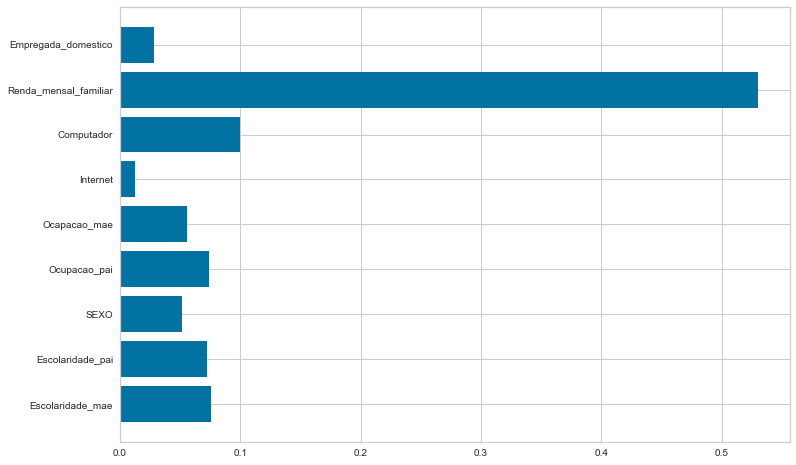

In [228]:
plt.figure(figsize = (12,8))
plt.barh(
    decision_tree.feature_names_in_,
    decision_tree.feature_importances_
);

 TEMA:
 
 - 

Modelo Catboost
- https://medium.com/data-hackers/entendendo-catboost-um-guia-quase-definitivo-b28bc153a78
- https://towardsdatascience.com/deep-dive-into-catboost-functionalities-for-model-interpretation-7cdef669aeed

In [ ]:
import catboost